# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and Exploratory Data Analysis. In order to complete this lab, you'll have to make import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
* Show mastery of the content covered in this section

## The Dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!

## Goals
* Use all available pandas knowledge to clean the dataset and deal with null values
* Use Queries and aggregations to group the data into interesting subsets as needed
* Use descriptive statistics and data visualization to find answers to questions we may have about the data. 

## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources--`heroes_information.csv` and `super_hero_powers.csv`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the head of each to ensure that everything loaded correctly.  

In [51]:
heroes_df = pd.read_csv('heroes_information.csv')
print(heroes_df.head())

   Unnamed: 0         name Gender Eye color               Race Hair color  \
0           0       A-Bomb   Male    yellow              Human    No Hair   
1           1   Abe Sapien   Male      blue      Icthyo Sapien    No Hair   
2           2     Abin Sur   Male      blue            Ungaran    No Hair   
3           3  Abomination   Male     green  Human / Radiation    No Hair   
4           4      Abraxas   Male      blue      Cosmic Entity      Black   

   Height          Publisher Skin color Alignment  Weight  
0   203.0      Marvel Comics          -      good   441.0  
1   191.0  Dark Horse Comics       blue      good    65.0  
2   185.0          DC Comics        red      good    90.0  
3   203.0      Marvel Comics          -       bad   441.0  
4   -99.0      Marvel Comics          -       bad   -99.0  


In [52]:
powers_df = pd.read_csv('super_hero_powers.csv')
print(powers_df.head())

    hero_names  Agility  Accelerated Healing  Lantern Power Ring  \
0      3-D Man     True                False               False   
1       A-Bomb    False                 True               False   
2   Abe Sapien     True                 True               False   
3     Abin Sur    False                False                True   
4  Abomination    False                 True               False   

   Dimensional Awareness  Cold Resistance  Durability  Stealth  \
0                  False            False       False    False   
1                  False            False        True    False   
2                  False             True        True    False   
3                  False            False       False    False   
4                  False            False       False    False   

   Energy Absorption  Flight     ...      Web Creation  Reality Warping  \
0              False   False     ...             False            False   
1              False   False     ...        

It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [53]:
heroes_df = heroes_df.drop('Unnamed: 0', axis=1)
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Familiarize Yourself With the Dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesnt contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [54]:
# Looking at the shape, metadata, and statistical description of the data
print(heroes_df.head(), heroes_df.info(), heroes_df.describe())
print(heroes_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.4+ KB
          name Gender Eye color               Race Hair color  Height  \
0       A-Bomb   Male    yellow              Human    No Hair   203.0   
1   Abe Sapien   Male      blue      Icthyo Sapien    No Hair   191.0   
2     Abin Sur   Male      blue            Ungaran    No Hair   185.0   
3  Abomination   Male     green  Human / Radiation    No Hair   203.0   
4      Abraxas   Male      blue      Cosmic Entity      Black   -99.0   

           Publisher Skin color Alignment  Weight  
0      Ma

In [55]:
# Looking at the shape, metadata, and statistical description of the data
print(powers_df.head(), powers_df.info(), powers_df.describe())
print(powers_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB
    hero_names  Agility  Accelerated Healing  Lantern Power Ring  \
0      3-D Man     True                False               False   
1       A-Bomb    False                 True               False   
2   Abe Sapien     True                 True               False   
3     Abin Sur    False                False                True   
4  Abomination    False                 True               False   

   Dimensional Awareness  Cold Resistance  Durability  Stealth  \
0                  False            False       False    False   
1                  False            False        True    False   
2                  False             True        True    False   
3                  False            False       False    False   
4                  False            False       False    False   

   Energy Absorption  

## Dealing with Null Values

Starting in the cell below, detect and deal with any null values in either data frame.  Then, explain your methodology for detecting and dealing with outliers in the markdown section below.  Be sure to explain your strategy for dealing with null values in numeric columns, as well as your strategy for dealing with null values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:

My strategy centered around finding out which columns contained null values. This was done in the heroes_df by using the isna().sum() and in the powers_df by utlizing isna().any().any() due to the shear number of columns in powers_df. Powers_df did not have any columns with null values fortuntely so I focused on cleaning up heroes_df which had two columns with null values, weight and publisher. Since only 2 weight records were null, I imputed the median in order to give those cells a value. In regards to publisher, I thought it would be better to include a publisher category of "missing publisher" instead of random selection imputation since I had no specific reason to imput the missing values here. If I did, I would use the random from numpy as well as make use of the current probabilities of the given publishers.
____________________________________________________________________________________________________________________________




In [56]:
# Seeing the count of null values if any
print(heroes_df.isna().sum()) 
# There are 15 in Publisher and 2 in Weight

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64


In [57]:
# Filling na values in heroes_df.weight column with median values in weight
heroes_df.Weight.fillna(heroes_df.Weight.median(), inplace=True)
heroes_df.isna().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         0
dtype: int64

In [58]:
#Seeing the unique categorical values in Publisher column, no 'missing value' designation exists
heroes_df.Publisher.unique()

array(['Marvel Comics', 'Dark Horse Comics', 'DC Comics', 'NBC - Heroes',
       'Wildstorm', 'Image Comics', nan, 'Icon Comics', 'SyFy',
       'Hanna-Barbera', 'George Lucas', 'Team Epic TV', 'South Park',
       'HarperCollins', 'ABC Studios', 'Universal Studios', 'Star Trek',
       'IDW Publishing', 'Shueisha', 'Sony Pictures', 'J. K. Rowling',
       'Titan Books', 'Rebellion', 'Microsoft', 'J. R. R. Tolkien'],
      dtype=object)

In [59]:
#It would probably be unreasonable to use these probabilities to randomly assign
#Though it is important to note that Marvel accounts for more than half of the records here
heroes_df.Publisher.value_counts(normalize=True)

Marvel Comics        0.539638
DC Comics            0.299026
NBC - Heroes         0.026426
Dark Horse Comics    0.025035
Image Comics         0.019471
George Lucas         0.019471
HarperCollins        0.008345
Star Trek            0.008345
Team Epic TV         0.006954
SyFy                 0.006954
Icon Comics          0.005563
ABC Studios          0.005563
Shueisha             0.005563
IDW Publishing       0.005563
Wildstorm            0.004172
Sony Pictures        0.002782
Universal Studios    0.001391
J. R. R. Tolkien     0.001391
Titan Books          0.001391
Rebellion            0.001391
South Park           0.001391
J. K. Rowling        0.001391
Microsoft            0.001391
Hanna-Barbera        0.001391
Name: Publisher, dtype: float64

In [60]:
# Filling in "Missing Publisher" for missing heroes_df.Publisher values
heroes_df.Publisher.fillna('Missing Publisher', inplace=True)
heroes_df.isna().sum()

name          0
Gender        0
Eye color     0
Race          0
Hair color    0
Height        0
Publisher     0
Skin color    0
Alignment     0
Weight        0
dtype: int64

In [61]:
# Checking null values in powers_df revealed how the multidimensionality of the df makes isna().sum() hard to use
powers_df.isna().sum().head()

hero_names               0
Agility                  0
Accelerated Healing      0
Lantern Power Ring       0
Dimensional Awareness    0
dtype: int64

In [62]:
# Seeing if any columns have a null value since there are so many columns
powers_df.isna().any().any()
# False, meaning there are no columns in powers_df with null values

False

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** If the join throws an error message, consider settin the the column you want to join on as the index for each DataFrame.  

In [67]:
powers_df.rename(columns={'hero_names': 'name'}, inplace=True)

In [70]:
powers_df = powers_df.astype('str')

In [72]:
herpow_df = powers_df.set_index('name').join(heroes_df.set_index('name'), how='inner')
herpow_df.head()

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Omniscient,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,False,True,False,False,False,True,False,False,False,False,...,False,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
Abe Sapien,True,True,False,False,True,True,False,False,False,False,...,False,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
Abin Sur,False,False,True,False,False,False,False,False,False,False,...,False,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
Abomination,False,True,False,False,False,False,False,False,False,False,...,False,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
Abraxas,False,False,False,True,False,False,False,False,True,False,...,False,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [77]:
#Checking for null values in the new data set, False meaning none
herpow_df.isna().any().any()

False

In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

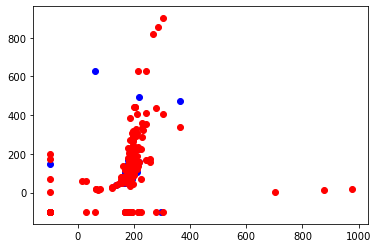

In [93]:
# Creating Male and female dataframes
heroes_F_df = heroes_df[heroes_df.Gender == 'Female']
heroes_M_df = heroes_df[heroes_df.Gender == 'Male']
#Checking that the dataframes make sense
heroes_F_df.head()
heroes_M_df.head()
# Scatter of height(x) and weight(y) for male (red) and female (blue) on the same plot
plt.scatter(heroes_F_df['Height'],heroes_F_df['Weight'], color='blue')
plt.scatter(heroes_M_df['Height'],heroes_M_df['Weight'], color='red')

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [96]:
# Dataframes created up above, top records shown here:
heroes_F_df.head()
heroes_M_df.head()

def show_distplot(dataframe, gender, column_name):
    plt.plot()
    sns.distplot(dataframe[column_name])
    plt.title("Distribution of {} for {} heroes".format(column_name, gender))
    plt.xlabel(column_name)
    plt.ylabel("Probability Density")
    plt.show()

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


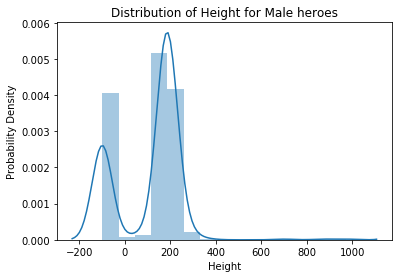

Mean Height for male heroes: 107.27524752475247
Median Height for male heroes: 180.0


In [107]:
# Male Height
show_distplot(heroes_M_df,'Male','Height')
print('Mean Height for male heroes:',heroes_M_df.Height.mean())
print('Median Height for male heroes:',heroes_M_df.Height.median())

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


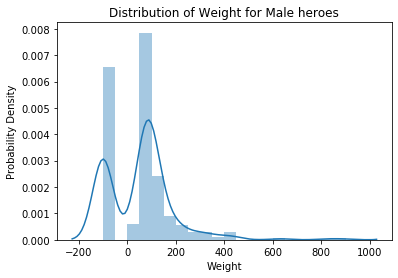

Mean Weight for male heroes: 52.07128712871287
Median Weight for male heroes: 79.0


In [109]:
# Male Weight
show_distplot(heroes_M_df, 'Male', 'Weight')
print('Mean Weight for male heroes:',heroes_M_df.Weight.mean())
print('Median Weight for male heroes:',heroes_M_df.Weight.median())

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


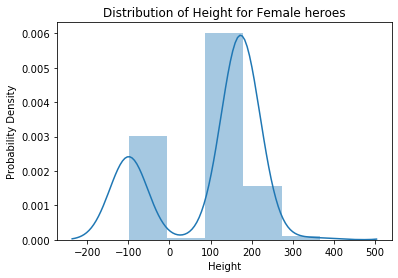

Mean Height for female heroes: 98.0525
Median Height for female heroes: 168.0


In [112]:
# Female Height
show_distplot(heroes_F_df, 'Female', 'Height')
print('Mean Height for female heroes:',heroes_F_df.Height.mean())
print('Median Height for female heroes:',heroes_F_df.Height.median())

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


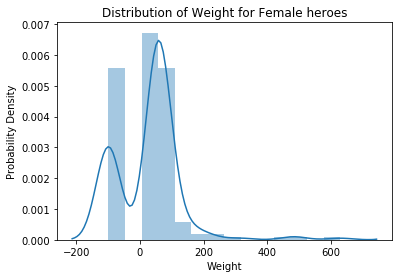

Mean Weight for female heroes: 27.265
Median Weight for female heroes: 54.0


In [114]:
# Female Weight
show_distplot(heroes_F_df, 'Female', 'Weight')
print('Mean Weight for female heroes:',heroes_F_df.Weight.mean())
print('Median Weight for female heroes:',heroes_F_df.Weight.median())

Discuss your findings from the plots above, with respect to the distibution of height and weight by gender.  Your explanation should include discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Wite your answer below this line:
Females tended to have distributions indicting less weight and shorter heights than males. However, I was surprised to see some values falling below 0 for weight. This would need a further look and potentilly cleanup.
____________________________________________________________________________________________________________________________



### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [138]:
def top_5_powers(dataframe): # Defining dunction
    df = dataframe.drop(heroes_df.columns.values[1:], axis=1) # dropping heroes_df columns 
    columns = df.columns.values # getting values for each column
    for col in columns: # iterating by each column
        df[col] = df[col].map({'True':1, "False":0}) # mapping the trues and falses for a the given df column
        
    power_counts_dict = dict(df.sum()) # distionay for power counts
    
    return sorted(power_counts_dict.items(), key=lambda x: x[1], reverse=True)[:5] # sorting powers from lowest to highest

overall_top_5 = top_5_powers(herpow_df) # Variable result for getting top_5 powers
marvel_df = herpow_df[herpow_df['Publisher'] == 'Marvel Comics'] # Marvel Dataframe
dc_df = herpow_df[herpow_df['Publisher'] == 'DC Comics'] # DC Dataframe
print(overall_top_5) # Getting overall top 5 powers
    

[('Super Strength', 362), ('Stamina', 294), ('Durability', 262), ('Super Speed', 251), ('Agility', 244)]


In [139]:
marvel_top_5 = top_5_powers(marvel_df)
marvel_top_5

[('Super Strength', 204),
 ('Durability', 154),
 ('Stamina', 150),
 ('Super Speed', 137),
 ('Agility', 126)]

In [140]:
dc_top_5 = top_5_powers(dc_df)
dc_top_5

[('Super Strength', 109),
 ('Stamina', 90),
 ('Flight', 86),
 ('Super Speed', 79),
 ('Agility', 71)]

<Figure size 432x288 with 0 Axes>

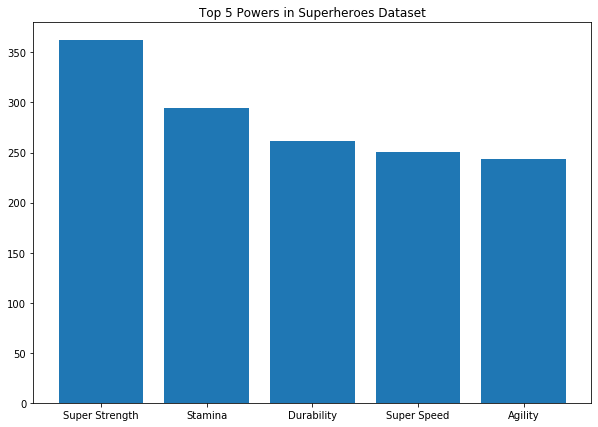

None

<Figure size 432x288 with 0 Axes>

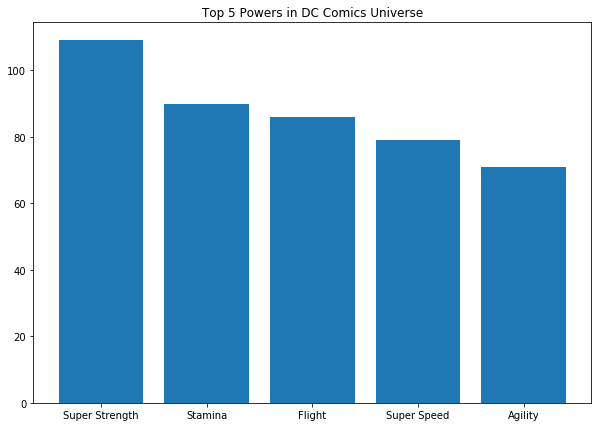

None

<Figure size 432x288 with 0 Axes>

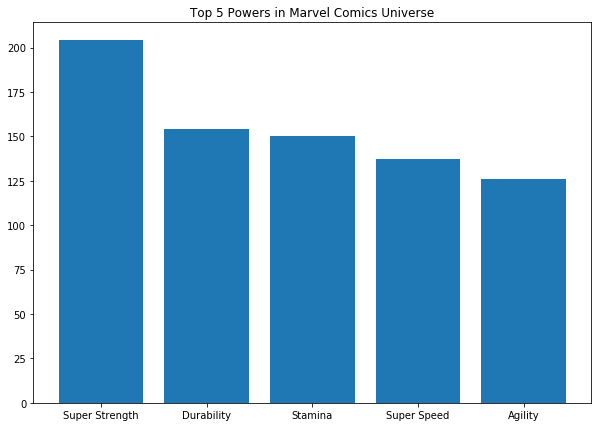

In [141]:
def top_5_bar_chart(top_5_list, publisher=None):
    marvel_powers = [i[0] for i in top_5_list]
    marvel_values = [i[1] for i in top_5_list]
    
    plt.clf()
    plt.figure(figsize=(10, 7))
    plt.bar(marvel_powers, marvel_values)
    if publisher:
        plt.title('Top 5 Powers in {} Universe'.format(publisher))
    else:
        plt.title('Top 5 Powers in Superheroes Dataset')
    plt.show()

display(top_5_bar_chart(overall_top_5))
display(top_5_bar_chart(dc_top_5, publisher='DC Comics'))
top_5_bar_chart(marvel_top_5, publisher='Marvel Comics')

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Wite your answer below this line:
The biggest difference to my review of the bar graphs was that durability was more important in Marvel whereas DC cared more about flight in its superhero abilities. Other than that, another simple notice was how the shear count of marvel superheroes vastly outweighed DC. In this case, maybe Marvel actually had a similar number of supers with a flight ability, but it just doesn't show in the top 5 bar graph due to a difference in count. It would also be interesting to see where durability lies for DC heroes.
____________________________________________________________________________________________________________________________


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occuring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

Goal: Skin Color Distribution of Aliens

Exploratory look of race and skin color columns in heroes_df. Heroes_df was chosen over powers_df because it was simply more relevant in this case. Powers info was simply not needed for the question in hand.

In [246]:
#Looking at the heores_df:
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [251]:
#Looking at column types for Race -- Particularily want to see the different Human ones:
heroes_df['Race'].unique()

array(['Human', 'Icthyo Sapien', 'Ungaran', 'Human / Radiation',
       'Cosmic Entity', '-', 'Cyborg', 'Xenomorph XX121', 'Android',
       'Vampire', 'Mutant', 'God / Eternal', 'Symbiote', 'Atlantean',
       'Alien', 'Neyaphem', 'New God', 'Alpha', 'Bizarro', 'Inhuman',
       'Metahuman', 'Demon', 'Human / Clone', 'Human-Kree',
       'Dathomirian Zabrak', 'Amazon', 'Human / Cosmic',
       'Human / Altered', 'Kryptonian', 'Kakarantharaian',
       'Zen-Whoberian', 'Strontian', 'Kaiju', 'Saiyan', 'Gorilla',
       'Rodian', 'Flora Colossus', 'Human-Vuldarian', 'Asgardian',
       'Demi-God', 'Eternal', 'Gungan', 'Bolovaxian', 'Animal',
       'Czarnian', 'Martian', 'Spartoi', 'Planet', 'Luphomoid',
       'Parademon', 'Yautja', 'Maiar', 'Clone', 'Talokite', 'Korugaran',
       'Zombie', 'Human-Vulcan', 'Human-Spartoi', 'Tamaranean',
       'Frost Giant', 'Mutant / Clone', "Yoda's species"], dtype=object)

In [250]:
# Looking at the column types for skin color:
heroes_df['Skin color'].unique()

array(['-', 'blue', 'red', 'black', 'grey', 'gold', 'green', 'white',
       'pink', 'silver', 'red / black', 'yellow', 'purple',
       'orange / white', 'gray', 'blue-white', 'orange'], dtype=object)

Above, I took note of '-' a few times as this will evidently be in the majority of records for both aliens and non-aliens alike. Here, I am using that by '-' they mean normal human skin color ranging from white to black and colors such as white and black in the dataset to literally mean black/white, not in the skin color sense. 

Here, I am defining Aliens as non-human foreign planet born heroes. Mixed-Race Humans in this case are still considered non-Aliens. Cyborgs, Androids, Maiars, Human-(alien), Clones, and other-like Races are also not considered aliens as they have an assumed origin of Earth, though this may not always be the case in reality. Aliens also does not include the '-' entry. This entry is included in the everyone else dataframe, that is heroes_E_df.

In [283]:
# Making Alien Dataframe:
heroes_A_df = heroes_df[heroes_df.Race.isin(['Ungaran', 'Cosmic Entity','Xenomorph XX121', 'God / Eternal',
                                            'Symbiote', 'Alien', 'New God',
                                             'Inhuman','Demon', 'Dathomirian Zabrak', 
                                             'Kryptonian', 'Kakarantharaian', 'Zen-Whoberian',
                                             'Strontian', 'Kaiju', 'Saiyan', 'Saiyan', 'Rodian'
                                             'Flora Colossus', 'Asgardian', 'Gungan', 
                                             'Bolovaxian','Czarnian', 'Martian', 'Spartoi', 
                                             'Planet','Luphomoid', 'Parademon', 'Yautja',
                                             'Talokite','Korugaran','Tamaranean','Frost Giant',
                                             'Yoda\'s species'])]
print(heroes_A_df.shape)
heroes_A_df.head()

(83, 10)


,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
17,Alien,Male,-,Xenomorph XX121,No Hair,244.0,Dark Horse Comics,black,bad,169.0
31,Anti-Monitor,Male,yellow,God / Eternal,No Hair,61.0,DC Comics,-,bad,-99.0
33,Anti-Venom,Male,blue,Symbiote,Blond,229.0,Marvel Comics,-,-,358.0


In [333]:
heroes_A_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 2 to 731
Data columns (total 10 columns):
name          83 non-null object
Gender        83 non-null object
Eye color     83 non-null object
Race          83 non-null object
Hair color    83 non-null object
Height        83 non-null float64
Publisher     83 non-null object
Skin color    83 non-null object
Alignment     83 non-null object
Weight        83 non-null float64
dtypes: float64(2), object(8)
memory usage: 9.6+ KB


In [286]:
# Creating a Dataset of Everyone else (ie. non-Aliens)
heroes_E_df = heroes_df[-heroes_df.Race.isin(['Ungaran', 'Cosmic Entity','Xenomorph XX121', 'God / Eternal',
                                            'Symbiote', 'Alien', 'New God',
                                             'Inhuman','Demon', 'Dathomirian Zabrak', 
                                             'Kryptonian', 'Kakarantharaian', 'Zen-Whoberian',
                                             'Strontian', 'Kaiju', 'Saiyan', 'Saiyan', 'Rodian'
                                             'Flora Colossus', 'Asgardian', 'Gungan', 
                                             'Bolovaxian','Czarnian', 'Martian', 'Spartoi', 
                                             'Planet','Luphomoid', 'Parademon', 'Yautja',
                                             'Talokite','Korugaran','Tamaranean','Frost Giant',
                                             'Yoda\'s species'])]
print(heroes_H_df.shape)
heroes_E_df.head()

(651, 10)


,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
5,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,-,bad,122.0
6,Adam Monroe,Male,blue,-,Blond,-99.0,NBC - Heroes,-,good,-99.0


Now, I set a column series counting the frequency of sking colors amongst those heroes who are not aliens. Once again '-' takes presidence.

In [343]:
heroes_A_gr_skin = heroes_A_df.groupby(['Skin color'])['name'].count()
heroes_A_gr_skin

Skin color
-                 53
black              1
blue               2
blue-white         1
gold               2
green              7
grey               3
orange             1
orange / white     1
pink               1
purple             1
red                3
red / black        1
silver             1
white              4
yellow             1
Name: name, dtype: int64

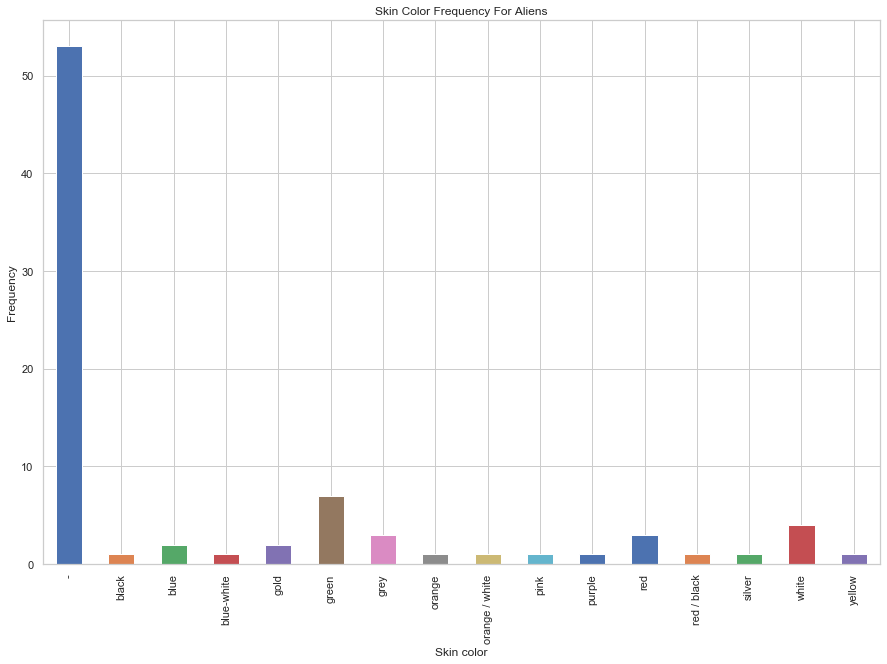

In [349]:
heroes_A_gr_skin.plot.bar(figsize=(15,10))
plt.title('Skin Color Frequency For Aliens')
plt.ylabel('Frequency')
plt.show()

Now, I set a column series counting the frequency of sking colors amongst those heroes who are not aliens. Once again '-' takes presidence.

In [352]:
heroes_E_gr_skin = heroes_E_df.groupby(['Skin color'])['name'].count()
heroes_E_gr_skin.head()

Skin color
-        609
blue       7
gold       1
gray       1
green     14
Name: name, dtype: int64

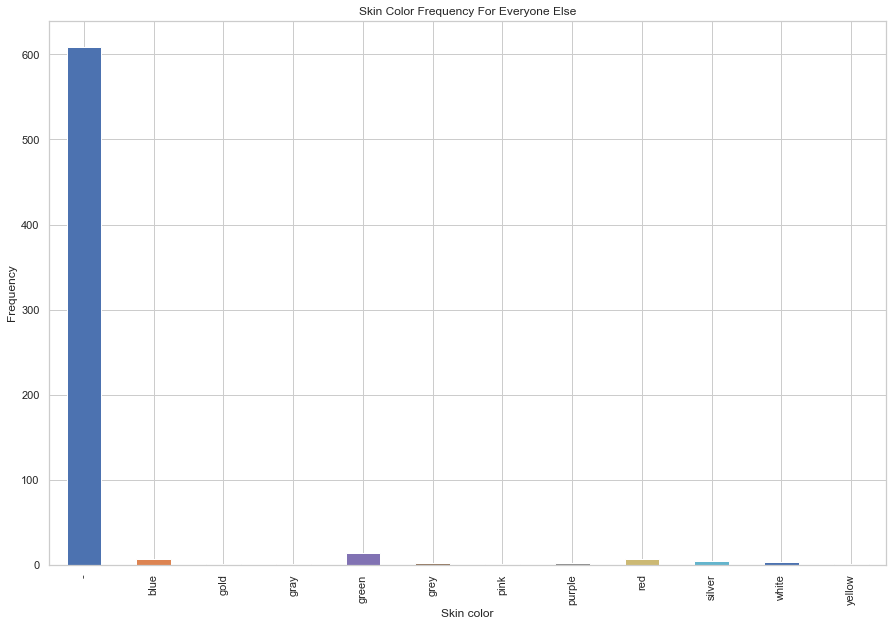

In [353]:
#Barplot for skin frequency among everyone else who is not alien in nature
heroes_E_gr_skin.plot.bar(figsize=(15,10))
plt.title('Skin Color Frequency For Everyone Else')
plt.ylabel('Frequency')
plt.show()

Next, I take a look at the height of aliens and non-aliens.

In [354]:
#Setting Alien groupby series for height
heroes_A_gr_height = heroes_A_df.groupby(['Skin color'])['Height'].median()
heroes_A_gr_height

Skin color
-                 180.0
black             244.0
blue              179.0
blue-white        229.0
gold               47.0
green             188.0
grey              201.0
orange            193.0
orange / white    193.0
pink              234.0
purple            198.0
red               185.0
red / black       170.0
silver            193.0
white             187.0
yellow            193.0
Name: Height, dtype: float64

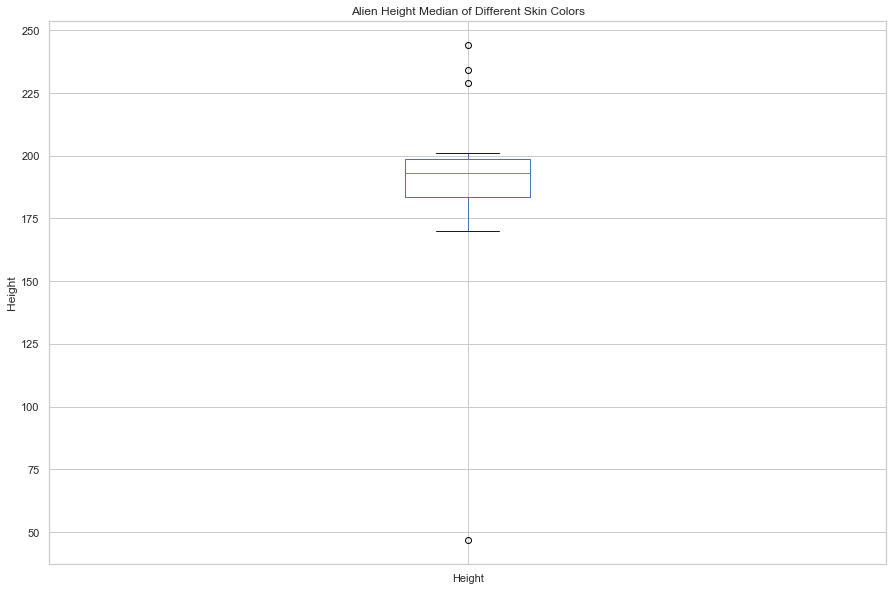

In [364]:
#Boxplot for skin frequency among everyone else who is not alien in nature
heroes_A_gr_height.plot(kind='box',figsize=(15,10))
plt.title('Alien Height Median of Different Skin Colors')
plt.ylabel('Height')
plt.show()

In [365]:
#Setting groupby series for Everyone else's height
heroes_E_gr_height = heroes_E_df.groupby(['Skin color'])['Height'].median()
heroes_E_gr_height

Skin color
-         175.0
blue      180.0
gold      163.0
gray      213.0
green     171.5
grey      199.0
pink      165.0
purple    190.5
red       185.5
silver    188.0
white     191.0
yellow    196.0
Name: Height, dtype: float64

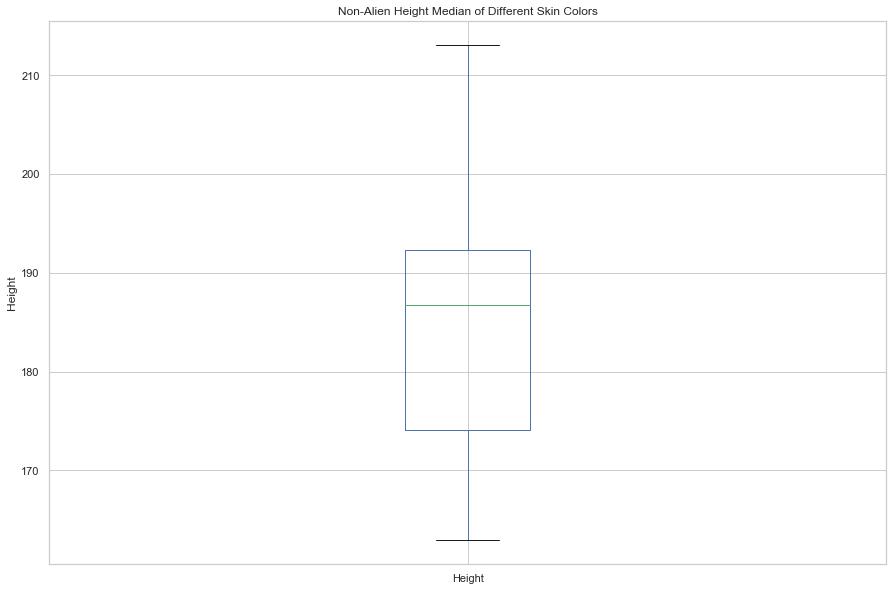

In [361]:
#Barplot for skin frequency among everyone else who is not alien in nature
heroes_E_gr_height.plot(kind='box',figsize=(15,10))
plt.title('Non-Alien Height Median of Different Skin Colors')
plt.ylabel('Height')
plt.show()

The heights of aliens seemed to be pretty concentrated around the median value in the upper 100's wheres everyone else's seemed to variate a lot more with a larger range.

In [368]:
#Setting Alien groupby series for height
heroes_A_gr_weight = heroes_A_df.groupby(['Skin color'])['Weight'].median()
heroes_A_gr_weight

Skin color
-                  73.0
black             169.0
blue               68.5
blue-white        288.0
gold               -0.5
green              77.0
grey               97.0
orange             71.0
orange / white    -99.0
pink              324.0
purple            268.0
red                90.0
red / black       -99.0
silver            101.0
white              -4.0
yellow            203.0
Name: Weight, dtype: float64

In [369]:
#Setting groupby series for Everyone else's height
heroes_E_gr_weight = heroes_E_df.groupby(['Skin color'])['Weight'].median()
heroes_E_gr_weight

Skin color
-          61.0
blue       65.0
gold       59.0
gray      -99.0
green      60.0
grey      169.0
pink       56.0
purple    258.5
red        92.5
silver    147.5
white      86.0
yellow     47.0
Name: Weight, dtype: float64

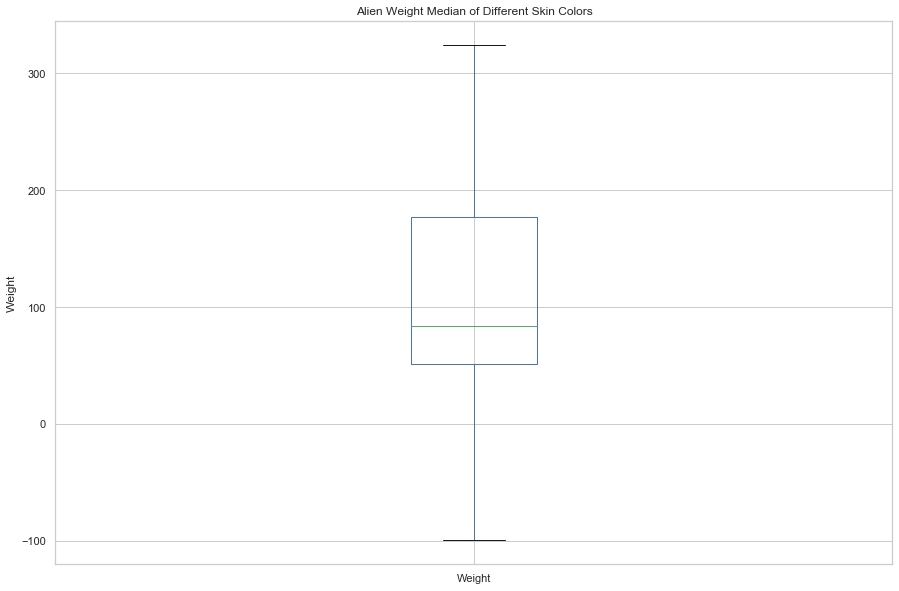

In [372]:
#Boxplot for skin frequency among everyone else who is not alien in nature
heroes_A_gr_weight.plot(kind='box',figsize=(15,10))
plt.title('Alien Weight Median of Different Skin Colors')
plt.ylabel('Weight')
plt.show()

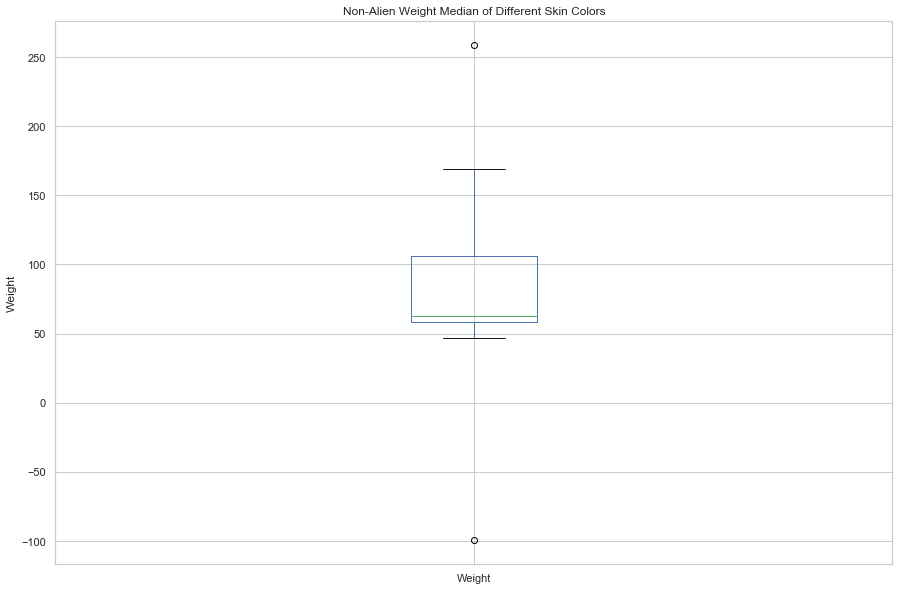

In [373]:
#Barplot for skin frequency among everyone else who is not alien in nature
heroes_E_gr_weight.plot(kind='box',figsize=(15,10))
plt.title('Non-Alien Weight Median of Different Skin Colors')
plt.ylabel('Weight')
plt.show()

Overall for, everyone else was lighter than the aliens 20-30 pounds according to the median value. This makes some intuitive sense given some of the aliens are literally xenomorphs. I'd assume some of those are heavy.

Below are some failed attempts with some different ideas.

In [ ]:
#heroes_A_df.plot(x=heroes_A_df,kind='bar', figsize=(20,10))
#plt.show()

In [340]:
#sns.set(style="whitegrid")
#ax = sns.boxplot(x=heroes_E_gr_skin['Skin color'],  y=heroes_E_gr_skin['name'])
#sns.boxplot?

In [339]:
# Creating boxplot function
#def show_boxplot(dataframe,race,column_name):
    #plt.plot()
    #sns.barplot(x=column_name, data=dataframe)
    #plt.title("Distribution of {} for {} heroes".format(column_name, race))
    #plt.xlabel(column_name)
    #plt.ylabel("Probability Density")
    #plt.show()
#show_violinplot(heroes_A_df, 'Aliens','Skin color')

In [338]:
#sns.set(style="whitegrid")
#ax = sns.boxplot(x=heroes_A_df["Skin color"])

In [334]:
#count = []
#for row in heroes_df:
    #if 'Human' not in heroes_df['Race']:
        #count.append(row)
    #else: 
        #continue
#print(count)

#print(herpow_df['Race'])
#herpow_alien_df = herpow_df[herpow_df['Race'] != 'Human']
#herpow_alien_df.head()
#herpow_alien_df = herpow_df[row['Race']]

In [335]:
#print(top_5_supers(herpow_df))

In [336]:
# Which Super Heroes have the most Powers:
#def top_5_supers(dataframe): # Defining dunction
    #df = dataframe.drop(heroes_df.columns.values[1:], axis=1) # dropping heroes_df columns 
    #for i in df: # iterating by each row
        #df[i] = df[i].map({'True':1, "False":0}) # mapping the trues and falses for a the given df column
        
    #power_counts_dict = dict(df.sum(axis=1)) # distionary for power counts
    
    #return sorted(power_counts_dict.items(), key=itemgetter()[:5] # sorting powers from lowest to highest

In [337]:
#herpow_df1 = herpow_df 
#herpow_df2 = herpow_df1.drop(heroes_df.columns.values[1:], axis=1)
#for i in herpow_df2:
    #herpow_df2[i] = herpow_df2[i].map({'True':1, "False":0})
    #print(herpow_df2[i])
#power_counts_dict = dict(herpow_df2.sum(axis=1))
#print(power_counts_dict.items())
#sorted(power_counts_dict.items(), key=lambda x: x[1], reverse=True)[:5]

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data